In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import mode
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df= pd.read_csv(r"C:\Users\91758\Downloads\Black Friday Sale\train.csv")
df_test= pd.read_csv(r"C:\Users\91758\Downloads\Black Friday Sale\test.csv")

In [3]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [4]:
ts=df.shape
ts=ts[0]
ts

550068

In [5]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [6]:
df_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [7]:
sh=df_test.shape
sh

(233599, 11)

In [8]:
data=pd.concat([df,df_test])

C:\Users\91758\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [9]:
data.shape

(783667, 12)

In [10]:
data.head()

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_Category_3,Product_ID,Purchase,Stay_In_Current_City_Years,User_ID
0,0-17,A,F,0,10,3,NaN,NaN,P00069042,8370.0,2,1000001
1,0-17,A,F,0,10,1,6.0,14.0,P00248942,15200.0,2,1000001
2,0-17,A,F,0,10,12,NaN,NaN,P00087842,1422.0,2,1000001
3,0-17,A,F,0,10,12,14.0,NaN,P00085442,1057.0,2,1000001
4,55+,C,M,0,16,8,NaN,NaN,P00285442,7969.0,4+,1000002


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 233598
Data columns (total 12 columns):
Age                           783667 non-null object
City_Category                 783667 non-null object
Gender                        783667 non-null object
Marital_Status                783667 non-null int64
Occupation                    783667 non-null int64
Product_Category_1            783667 non-null int64
Product_Category_2            537685 non-null float64
Product_Category_3            237858 non-null float64
Product_ID                    783667 non-null object
Purchase                      550068 non-null float64
Stay_In_Current_City_Years    783667 non-null object
User_ID                       783667 non-null int64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [12]:
data.isnull().sum()

Age                                0
City_Category                      0
Gender                             0
Marital_Status                     0
Occupation                         0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Product_ID                         0
Purchase                      233599
Stay_In_Current_City_Years         0
User_ID                            0
dtype: int64

In [13]:
l=["City_Category","Gender","Marital_Status","Occupation","Product_Category_1","Product_Category_2","Product_Category_3","Product_ID","Stay_In_Current_City_Years","User_ID"]
for i in l:
    print(i)
    print(data[i].value_counts())
    print('---------------------------------------------------')

City_Category
B    329739
C    243684
A    210244
Name: City_Category, dtype: int64
---------------------------------------------------
Gender
M    590031
F    193636
Name: Gender, dtype: int64
---------------------------------------------------
Marital_Status
0    462538
1    321129
Name: Marital_Status, dtype: int64
---------------------------------------------------
Occupation
4     103086
0      98850
7      84127
1      67687
17     57418
20     47840
12     44448
14     38782
2      37996
16     36122
6      29102
3      25126
10     18304
5      17373
15     17356
11     16593
19     11919
13     11053
18      9367
9       8929
8       2189
Name: Occupation, dtype: int64
---------------------------------------------------
Product_Category_1
5     215950
1     200699
8     162294
11     34440
2      34056
6      29326
3      28791
4      16756
16     13933
15      8984
13      7930
10      7373
12      5610
7       5345
18      4436
20      2550
14      2186
19      1603
17      

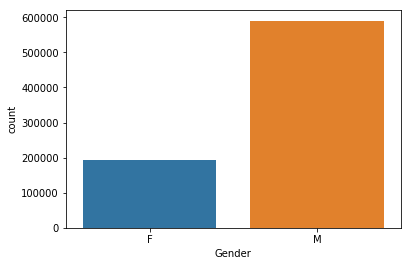

In [14]:
sns.countplot(data['Gender'])

Male purchases more than female in Black Friday Sale

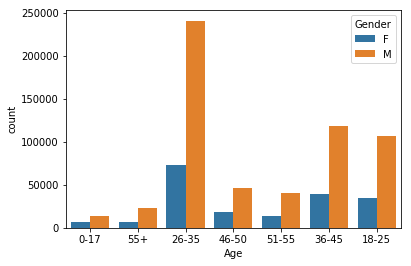

In [15]:
sns.countplot(data['Age'], hue= data['Gender'])

Both male and female purchase more in 26-35 age group. and 0-17 age group puchase the least.

In [16]:
data['User_ID'].nunique()

5891

In [17]:
#We will check how much each occcupation people spend on purchasing
p_avg= data.pivot_table(values='Purchase', index='Occupation', aggfunc='sum')
p_avg

,Purchase
Occupation,
0,635406958.0
1,424614144.0
2,238028583.0
3,162002168.0
4,666244484.0
5,113649759.0
6,188416784.0
7,557371587.0
8,14737388.0


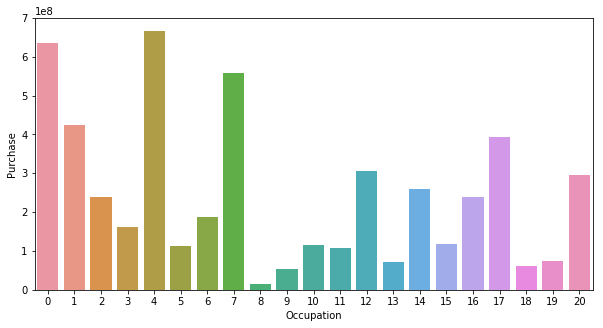

In [18]:
plt.figure(figsize=(10,5))
sns.barplot( p_avg.index , p_avg['Purchase'])

It can be easily observed that people having occupations 0 and 4 spent the most money during Black Friday sales. On the other hand, the people belonging to the occupations with ID 18, 19, and especially occupation 8, have spent the least amount of money. It can imply that these groups are the poorest ones, or contrary, the richest people who don't like to shop in that kind of retail stores.

([<matplotlib.patches.Wedge at 0x219ae26b550>,
 [Text(0.2710002461792907, 1.0660951489293833, 'A'),
  Text(-0.9761836970549788, -0.5070161630599893, 'C'),
  Text(0.731884994622866, -0.8211847262619341, 'B')],
 [Text(0.14781831609779492, 0.5815064448705727, '42.1%'),
  Text(-0.5324638347572611, -0.2765542707599941, '31.1%'),
  Text(0.3992099970670178, -0.4479189415974185, '26.8%')])

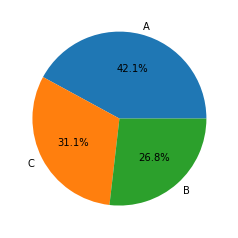

In [19]:
#Now we will check with the city
plt.pie(data['City_Category'].value_counts(), labels=data['City_Category'].unique(), autopct='%1.1f%%')

In [20]:
#only 30% of Product_Category_3 data is available. So we will drop it
data.drop('Product_Category_3',axis=1,inplace= True)

In [21]:
data['Product_Category_2']=data['Product_Category_2'].fillna(data['Product_Category_2'].mean())

In [22]:
l1=["City_Category","Gender","Age","Stay_In_Current_City_Years"]
le= LabelEncoder()
for i in l1:
    data[i]= le.fit_transform(data[i])

In [23]:
data.head()

,Age,City_Category,Gender,Marital_Status,Occupation,Product_Category_1,Product_Category_2,Product_ID,Purchase,Stay_In_Current_City_Years,User_ID
0,0,0,0,0,10,3,9.844506,P00069042,8370.0,2,1000001
1,0,0,0,0,10,1,6.000000,P00248942,15200.0,2,1000001
2,0,0,0,0,10,12,9.844506,P00087842,1422.0,2,1000001
3,0,0,0,0,10,12,14.000000,P00085442,1057.0,2,1000001
4,6,2,1,0,16,8,9.844506,P00285442,7969.0,4,1000002


In [24]:
xtrain= data[:ts]
xtest= data[ts:]

In [25]:
xtrain.shape

(550068, 11)

In [26]:
xtrain.isnull().sum()

Age                           0
City_Category                 0
Gender                        0
Marital_Status                0
Occupation                    0
Product_Category_1            0
Product_Category_2            0
Product_ID                    0
Purchase                      0
Stay_In_Current_City_Years    0
User_ID                       0
dtype: int64

In [27]:
xtest.isnull().sum()

Age                                0
City_Category                      0
Gender                             0
Marital_Status                     0
Occupation                         0
Product_Category_1                 0
Product_Category_2                 0
Product_ID                         0
Purchase                      233599
Stay_In_Current_City_Years         0
User_ID                            0
dtype: int64

In [28]:
x= xtrain.drop(['Purchase','Product_ID','User_ID'],axis=1)
y=xtrain['Purchase']

In [29]:
x_train,x_valid,y_train,y_valid= train_test_split(x,y,test_size=0.25,random_state=4)

In [30]:
def rmse(yactual, predict):
    r= np.sqrt(mean_squared_error(yactual,predict))
    return r

In [31]:
#Multiple Linear Regression
print("Multiple Linear Regression")
lr= LinearRegression()
lr.fit(x_train,y_train)
pred1= lr.predict(x_valid)

print("RMSE:", rmse(y_valid,pred1))

Multiple Linear Regression
RMSE: 4698.198141430255


In [32]:
p= PolynomialFeatures(2)
x= p.fit_transform(x_train)
xv= p.transform(x_valid)

In [33]:
#Polynomial Regression
print("Polynomial Regression")
plr= LinearRegression()
plr.fit(x,y_train)
pred2= plr.predict(xv)

print("RMSE:", rmse(y_valid,pred2))

Polynomial Regression
RMSE: 4439.169915330691


In [34]:
#Lasso Regression
print("Lasso Regression")
las= Lasso()
las.fit(x_train,y_train)
pred8= las.predict(x_valid)

print("RMSE:", rmse(y_valid,pred8))

Lasso Regression
RMSE: 4698.1761588662275


In [35]:
#Ridge Regression
print("Ridge Regression")
ri= Ridge(alpha=0.05,normalize=True)
ri.fit(x_train,y_train)
pred9= ri.predict(x_valid)

print("RMSE:", rmse(y_valid,pred9))

Ridge Regression
RMSE: 4698.877269238874


In [36]:
#Decision Tree Regressor
print("Decision Tree Regressor")
dt= DecisionTreeRegressor()
dt.fit(x_train,y_train)
pred3= dt.predict(x_valid)

print("RMSE:", rmse(y_valid,pred3))

Decision Tree Regressor
RMSE: 3151.8121972597696


In [37]:
#Random Forest Regressor
print("Random Forest Regressor")
rf= RandomForestRegressor()
rf.fit(x_train,y_train)
pred4= rf.predict(x_valid)

print("RMSE:", rmse(y_valid,pred4))

Random Forest Regressor


C:\Users\91758\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE: 3040.6472076305527


In [38]:
#Hyperparameter Tuning
rf1= RandomForestRegressor()
params = {'n_estimators': [50, 100, 200, 300],
          'max_features': ['auto','sqrt'],
          'max depth': [1, 2, 3, 5, 10],
          'oob_score': [True, False],
          'max_depth': [3, 4, 5],
         }
folds = 5
param_comb = 800
SEED=5
random_search = RandomizedSearchCV(rf1, param_distributions=params, 
                                   n_iter=param_comb, scoring='mse', 
                                   n_jobs=-1, cv=folds, verbose=3, random_state=SEED)
rf1.fit(x_train,y_train)
pred5= rf1.predict(x_valid)

print("RMSE:", rmse(y_valid,pred5))

C:\Users\91758\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RMSE: 3037.195843594708


In [39]:
#Gradient Boosting Regressor
gb=  GradientBoostingRegressor()
params = {'n_estimators': [50, 100, 200, 300],
          'learning_rate': [0.01, 0.05, 0.1, 0.15],
          'min_samples_split': [1, 2, 3, 5, 10],
          'subsample': [0.6, 0.7, 0.8],
          'max_depth': [3, 4, 5],
         }
folds = 5
param_comb = 800
random_search = RandomizedSearchCV(gb, param_distributions=params, 
                                   n_iter=param_comb, scoring='mse', 
                                   n_jobs=-1, cv=folds, verbose=3, random_state=SEED)

gb.fit(x_train,y_train)
pred6= gb.predict(x_valid)

print("RMSE:", rmse(y_valid,pred6))

RMSE: 3000.284340066297


In [40]:
x_test=xtest.drop(['Purchase','Product_ID','User_ID'], axis=1)

In [41]:
x_test.isnull().sum()

Age                           0
City_Category                 0
Gender                        0
Marital_Status                0
Occupation                    0
Product_Category_1            0
Product_Category_2            0
Stay_In_Current_City_Years    0
dtype: int64

In [49]:
predict= rf1.predict(x_test)

In [50]:
pre= pd.Series(predict)

In [51]:
a= pd.concat([pre,xtest['User_ID'], xtest['Product_ID']],axis=1)

In [52]:
a.columns=['Purchase','User_ID','Product_ID']

In [53]:
a.head()

,Purchase,User_ID,Product_ID
0,18680.560000,1000004,P00128942
1,10653.853333,1000009,P00113442
2,8333.656296,1000010,P00288442
3,2244.625000,1000010,P00145342
4,1203.758333,1000011,P00053842


In [54]:
a.to_csv("C:/Users/91758/Downloads/Black Friday Sale/solution.csv",index= False)